In [372]:
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [459]:
df = pd.read_csv('adjusted_outputi.csv')

## Standardrize the Size

In [374]:
scaler = StandardScaler()
scaler.fit(df['size'].reshape(-1, 1))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [375]:
scaler.mean_

array([59.07692308])

In [376]:
data = scaler.transform(df['size'].reshape(-1, 1))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [384]:
df['new'] = data
df_std = df.drop(columns = ['size'])

In [385]:
df_std.new.value_counts()

-0.374696    141
 0.657305     87
-1.406697     54
 1.689306     34
 2.721307      7
-2.438697      2
Name: new, dtype: int64

In [386]:
df_std.describe()

,Height,Bust,Waist,Hips,Bra,new
count,325.000000,325.000000,325.000000,325.000000,325.00000,3.250000e+02
mean,157.633846,82.803077,66.987692,88.796923,33.36000,-1.229786e-17
std,10.295544,7.500905,5.011084,7.028293,1.55841,1.001542e+00
min,137.000000,70.000000,60.000000,80.000000,32.00000,-2.438697e+00
25%,152.000000,78.000000,63.000000,84.000000,32.00000,-3.746957e-01
50%,159.000000,83.000000,66.000000,88.000000,34.00000,-3.746957e-01
75%,165.000000,87.000000,71.000000,92.000000,34.00000,6.573052e-01
max,178.000000,105.000000,80.000000,115.000000,38.00000,2.721307e+00


## convert Bra_band_size from inch to cm

In [387]:
df_std['Bra'] = df_std['Bra']*2.54
df_std.to_csv('data_std.csv')

In [380]:
corr = df_std.corr().sort_values(by=['new'], ascending=False)

In [496]:
df_std['size'] = df_std['new']
df = df_std.drop(columns = 'new')

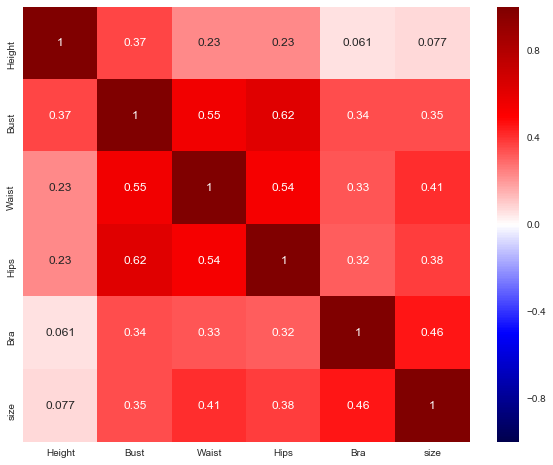

In [497]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), cmap="seismic", vmax=1, vmin=-1, annot=True)

In [ ]:
## original analysis

In [388]:
y, X = patsy.dmatrices('new ~ Height + Bust + Bra + Waist + Hips ', data=df_std, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    new   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     27.97
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           1.72e-23
Time:                        11:34:34   Log-Likelihood:                -402.07
No. Observations:                 325   AIC:                             816.1
Df Residuals:                     319   BIC:                             838.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.6001      1.229     -9.436      0.000     -14.019      -9.182
Height        -0.0039      0.005     -0.797      0.426      -0.014       0.006
Bust           0.0054      0.009      0.614      0.540      -0.012       0.023
Bra            0.0842      0.013      6.529      0.000       0.059       0.110
Waist          0.0423      0.012      3.569      0.000       0.019       0.066
Hips           0.0202      0.009      2.266      0.024       0.003       0.038
==============================================================================
Omnibus:                       13.096   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.718
Skew:                           0.500   Prob(JB):                      0.00105
Kurtosis:                       3.107   Cond. No.                     5.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#drop Height and Bust

In [322]:
y, X = patsy.dmatrices('new ~ Bra + Waist + Hips ', data=df_std, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    new   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     46.53
Date:                Wed, 25 Apr 2018   Prob (F-statistic):           5.41e-25
Time:                        16:40:21   Log-Likelihood:                -402.48
No. Observations:                 325   AIC:                             813.0
Df Residuals:                     321   BIC:                             828.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1114      1.058    -11.443      0.000     -14.194     -10.029
Bra            0.0858      0.013      6.759      0.000       0.061       0.111
Waist          0.0433      0.011      3.838      0.000       0.021       0.065
Hips           0.0218      0.008      2.737      0.007       0.006       0.038
==============================================================================
Omnibus:                       13.134   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.700
Skew:                           0.498   Prob(JB):                      0.00106
Kurtosis:                       3.144   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Variable distribution

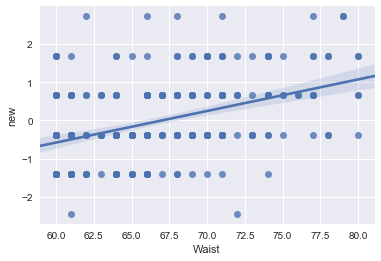

In [323]:
sns.set(color_codes=True)
ax = sns.regplot(x="Waist", y="new", data=df)

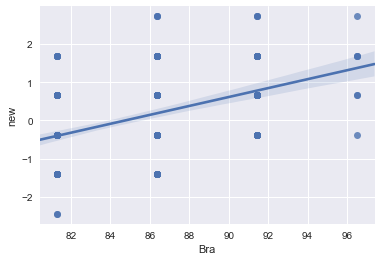

In [324]:
sns.set(color_codes=True)
ax = sns.regplot(x="Bra", y="new", data=df)

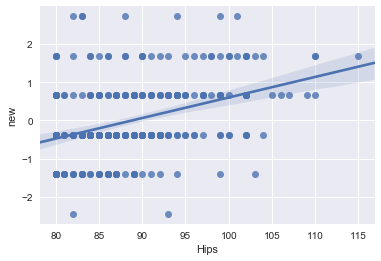

In [325]:
sns.set(color_codes=True)
ax = sns.regplot(x="Hips", y="new", data=df)

In [ ]:
#Sample distribution

Text(0,0.5,'sample number')

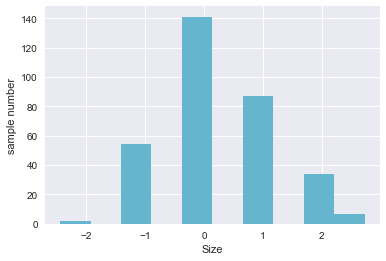

In [449]:
plt.hist(df.new, facecolor='c')
plt.xlabel('Size')
plt.ylabel('sample number')

Text(0,0.5,'sample number')

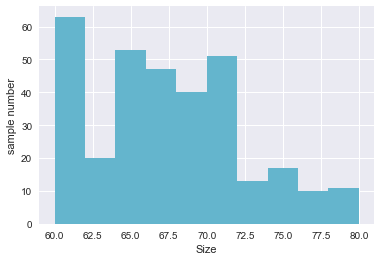

In [450]:
plt.hist(df.Waist, facecolor='c')
plt.xlabel('Size')
plt.ylabel('sample number')

Text(0,0.5,'sample number')

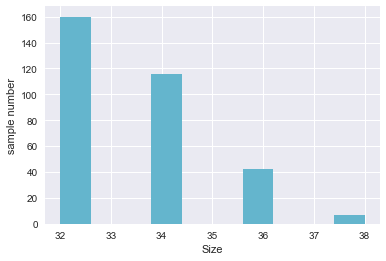

In [451]:
plt.hist(df.Bra, facecolor='c')
plt.xlabel('Size')
plt.ylabel('sample number')

Text(0,0.5,'sample number')

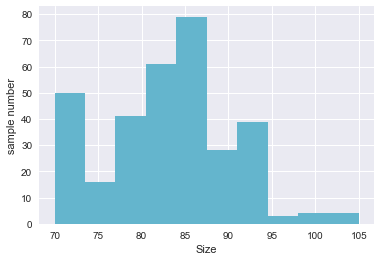

In [452]:
plt.hist(df.Bust, facecolor='c')
plt.xlabel('Size')
plt.ylabel('sample number')

Text(0,0.5,'sample number')

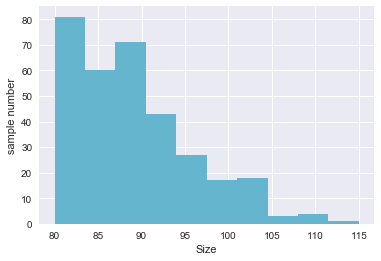

In [453]:
plt.hist(df.Hips, facecolor='c')
plt.xlabel('Size')
plt.ylabel('sample number')

Text(0,0.5,'sample number')

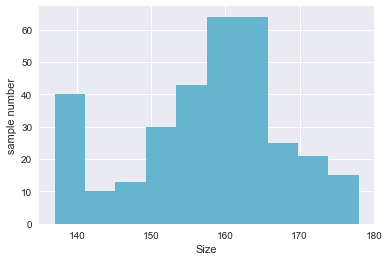

In [454]:
plt.hist(df.Height, facecolor='c')
plt.xlabel('Size')
plt.ylabel('sample number')

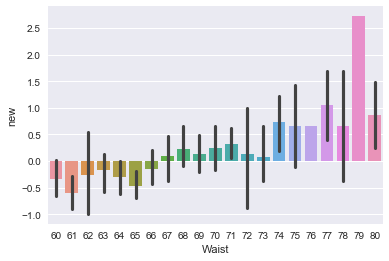

In [437]:
sns.set(color_codes=True)
ax = sns.barplot(x="Waist", y="new", data=df)

In [ ]:
# Drop Height and Bust, Bra_band_size_squared

In [498]:
y, X = patsy.dmatrices('new ~  Hips + Waist + Bra**2', data=df_std, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    new   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     46.53
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           5.41e-25
Time:                        22:11:41   Log-Likelihood:                -402.48
No. Observations:                 325   AIC:                             813.0
Df Residuals:                     321   BIC:                             828.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1114      1.058    -11.443      0.000     -14.194     -10.029
Hips           0.0218      0.008      2.737      0.007       0.006       0.038
Waist          0.0433      0.011      3.838      0.000       0.021       0.065
Bra            0.0858      0.013      6.759      0.000       0.061       0.111
==============================================================================
Omnibus:                       13.134   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.700
Skew:                           0.498   Prob(JB):                      0.00106
Kurtosis:                       3.144   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Try log left skeward variables

In [471]:
df['logW'] = np.log(df['Waist'])
df['logH'] = np.log(df['Hips'])
df.head()

,Item Size,Overall Fit,Height,Bust,Waist,Hips,Bra,size,log_new,lognew,logBu,logB,logW,logH
0,Item Size: XXS,Overall Fit: True to Size,178,84,72,93,32,1,0.000000,0.000000,4.430817,3.465736,4.276666,4.532599
1,Item Size: XXS,Overall Fit: True to Size,153,79,61,82,32,1,0.000000,0.000000,4.369448,3.465736,4.110874,4.406719
2,Item Size: XS,Overall Fit: True to Size,160,89,61,94,32,25,3.218876,3.218876,4.488636,3.465736,4.110874,4.543295
3,Item Size: XS,Overall Fit: True to Size,150,77,61,85,32,25,3.218876,3.218876,4.343805,3.465736,4.110874,4.442651
4,Item Size: XS,Overall Fit: True to Size,163,78,66,82,32,25,3.218876,3.218876,4.356709,3.465736,4.189655,4.406719


In [ ]:
#Try log size

In [476]:
y, X = patsy.dmatrices('lognew ~ Hips + Bra + logW + logH ', data=df, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lognew   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     22.33
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           2.80e-16
Time:                        14:21:36   Log-Likelihood:                -215.78
No. Observations:                 325   AIC:                             441.6
Df Residuals:                     320   BIC:                             460.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.0071     25.420     -0.944      0.346     -74.018      26.004
Hips          -0.0476      0.079     -0.600      0.549      -0.204       0.109
Bra            0.1024      0.019      5.527      0.000       0.066       0.139
logW           1.2878      0.432      2.984      0.003       0.439       2.137
logH           5.2155      7.235      0.721      0.471      -9.018      19.449
==============================================================================
Omnibus:                      279.001   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9005.926
Skew:                          -3.297   Prob(JB):                         0.00
Kurtosis:                      27.931   Cond. No.                     9.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Give size a smaller value 

In [170]:
y, X = patsy.dmatrices('smaller ~ Waist + Hips', data=df, return_type="dataframe")

model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                smaller   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     9.928
Date:                Thu, 19 Apr 2018   Prob (F-statistic):           0.000402
Time:                        23:43:48   Log-Likelihood:                -66.316
No. Observations:                  37   AIC:                             138.6
Df Residuals:                      34   BIC:                             143.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.2827      3.750     -2.476      0.018     -16.903      -1.663
Waist          0.1658      0.060      2.781      0.009       0.045       0.287
Hips           0.0560      0.043      1.291      0.205      -0.032       0.144
==============================================================================
Omnibus:                        4.153   Durbin-Watson:                   0.788
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.243
Skew:                           0.347   Prob(JB):                        0.326
Kurtosis:                       2.013   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""